In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD as sgd
from tensorflow.keras.regularizers import l2
import pandas as pd

In [3]:
NUM_CLASSES = 7

epochs = 371
batch_size = 8
num_neurons = 50
seed = 10

histories={}

np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
X_data = scale(X_data, np.min(X_data, axis=0), np.max(X_data, axis=0))
Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

idx1 = int(len(X_data)*0.7)
trainX = X_data[:idx1]
trainY = Y_data[:idx1]
testX = X_data[idx1:]
testY = Y_data[idx1:]

trainX = (trainX- np.mean(trainX, axis=0))/ np.std(trainX, axis=0)

In [12]:
np.delete(trainX, 4, 1)
np.delete(trainX, 0, 1)

array([[-0.24272496, -0.10923907,  0.04927278, -1.10182046, -0.6613028 ,
         0.90453403],
       [ 0.25095293,  0.76467348,  0.56024976,  0.556834  ,  0.13704092,
         0.90453403],
       [-1.23008074, -0.98315162, -0.4617042 ,  0.00394918, -0.91609334,
         0.90453403],
       ...,
       [-1.23008074,  0.76467348, -1.99463514, -1.10182046, -1.28978614,
        -1.1055416 ],
       [-0.07816567, -0.98315162,  0.04927278,  0.00394918,  0.06909677,
         0.90453403],
       [-1.23008074, -0.98315162, -0.4617042 , -0.54893564, -1.01800956,
        -1.1055416 ]])

In [13]:
#4-layer no dropouts
model_4_n = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(1)
])

opt = sgd(learning_rate=1e-3)

model_4_n.compile(optimizer=opt,
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])


In [14]:
# learn the network
histories['4-layer-no-dropouts'] =model_4_n.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY),
                                        verbose = 0)

In [18]:
#4-layer with dropouts
model_4_y = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

opt = sgd(learning_rate=1e-3)

model_4_y.compile(optimizer=opt,
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [19]:
# learn the network
histories['4-layer-with-dropouts'] =model_4_y.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY),
                                        verbose = 0)

In [20]:
#5-layer no dropouts
model_5_n = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(1)
])

opt = sgd(learning_rate=1e-3)

model_5_n.compile(optimizer=opt,
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [21]:
# learn the network
histories['5-layer-no-dropouts'] =model_5_n.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY),
                                        verbose = 0)

In [22]:
#5-layer with dropouts
model_5_y = keras.Sequential([
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

opt = sgd(learning_rate=1e-3)

model_5_y.compile(optimizer=opt,
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [23]:
# learn the network
histories['5-layer-with-dropouts'] =model_5_n.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY),
                                        verbose = 0)

In [31]:
#Base
model_base = keras.Sequential([
    keras.layers.Dense(30, activation='relu', kernel_regularizer=l2(1e-3)),
    keras.layers.Dense(1)
])

opt = sgd(learning_rate=1e-3)

model_base.compile(optimizer=opt,
              loss=keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [32]:
# learn the network
histories['base'] =model_base.fit(trainX, trainY,
                                        epochs=epochs,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY),
                                        verbose = 0)

In [24]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [33]:
accuracies=[]
accuracies.append(("Base",histories["base"].history['val_mse'][-1]))
accuracies.append(("4-Layers, no dropouts",histories["4-layer-no-dropouts"].history['val_mse'][-1]))
accuracies.append(("4-Layers, with dropouts",histories["4-layer-with-dropouts"].history['val_mse'][-1]))
accuracies.append(("5-Layers, no dropouts",histories["5-layer-no-dropouts"].history['val_mse'][-1]))
accuracies.append(("5-Layers, with dropouts",histories["5-layer-with-dropouts"].history['val_mse'][-1]))
df = pd.DataFrame(accuracies, columns=["Model", "Final Epoch MSE"])
df

,Model,Final Epoch MSE
0,Base,0.011608
1,"4-Layers, no dropouts",0.011122
2,"4-Layers, with dropouts",0.014179
3,"5-Layers, no dropouts",0.013599
4,"5-Layers, with dropouts",0.014855


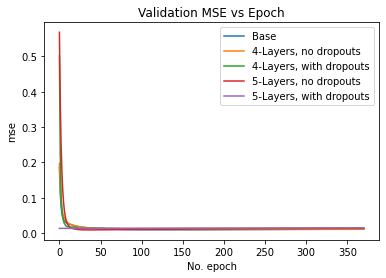

In [36]:
plt.plot(histories['base'].history['val_mse'], label='Base')
plt.plot(histories['4-layer-no-dropouts'].history['val_mse'], label='4-Layers, no dropouts')
plt.plot(histories['4-layer-with-dropouts'].history['val_mse'], label='4-Layers, with dropouts')
plt.plot(histories['5-layer-no-dropouts'].history['val_mse'], label='5-Layers, no dropouts')
plt.plot(histories['5-layer-with-dropouts'].history['val_mse'], label='5-Layers, with dropouts')
plt.title('Validation MSE vs Epoch')
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()